<a href="https://colab.research.google.com/github/Veena24-hub/Projects/blob/main/Advancing_Early_Diagnosis_of_Gestational_Diabetes_by_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Advancing Early Diagnosis of Gestational Diabetes by Using Machine Learning**



### Data Description

Diabetes Prediction Dataset

Source: Kaggle (provided by user: mrsimple07)

Link: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

Number of Records: 768

Description: By examining different health parameters, this dataset helps in determining if a person has diabetes.

Features: features such as glucose levels, blood pressure, skin thickness, insulin, BMI, age, and Outcome.

Objective: The primary goal is to use these medical characteristics to advance early diagnosis of gestational diabetes in patients.


### Data attributes: name of columns

Pregnancies: Number of times the patient has been pregnant.

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

BloodPressure: Diastolic blood pressure (mm Hg).

SkinThickness: Triceps skinfold thickness (mm).

Insulin: 2-Hour serum insulin (mu U/ml).

BMI: Body mass index (weight in kg/(height in m)^2).

DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.

Age: Age of the patient in years.

Outcome: Binary variable (0 or 1) indicating whether the patient has diabetes.



### Features selection

Based on the dataset attributes, we selected three important features for regression analysis:

1. Glucose– Strongly related to diabetes.

2. BMI– A major factor influencing diabetes risk.

3. Age– Older individuals are more prone to diabetes.



# Finding the Feature Importance Using Linear Regression

Compare the performance of `read.csv()` and `fread()`.

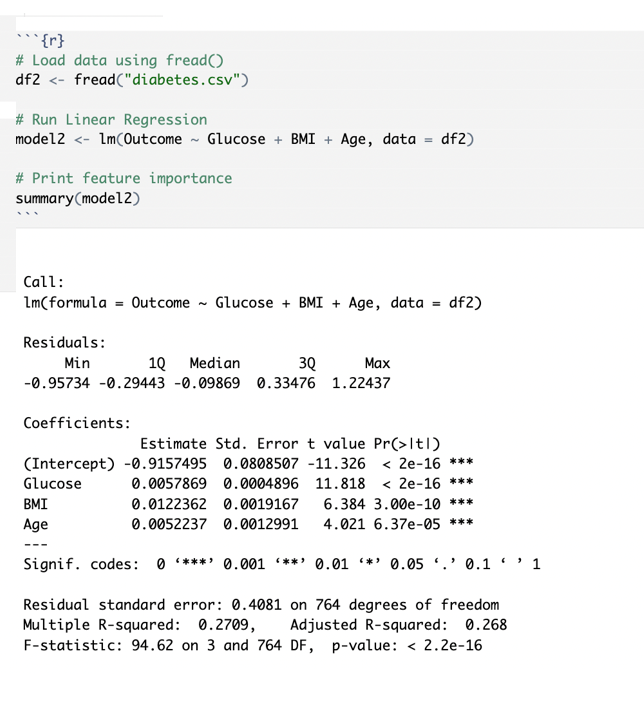

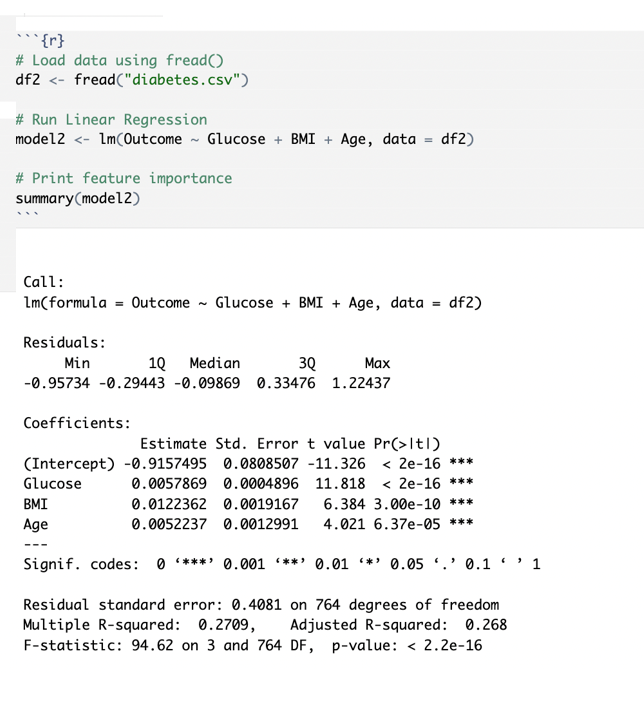

### Interpretation:
  The statistical analysis shows Glucose, BMI and Age as important predictors of the outcome which leads to higher outcome values (p < 0.001). Glucose demonstrates the strongest connection to the outcome than BMI with Age operating through a lesser degree. Other factors besides the model variables account for 73% of the outcome variation (R² = 0.2709). The research model demonstrates outstanding importance (p < 0.001) since it confirms that these variables represent key factors. The results show that Glucose, BMI and Age variables together influence the outcome to increase when their individual values are elevated. Both read.csv() and fread() yielded identical results when handling this dataset since they showed no time discrepancies when processing the data.


 **Profiling for Performance Optimization**: Profiling helps identify bottlenecks in execution time. Used `system.time()` to compare the two methods

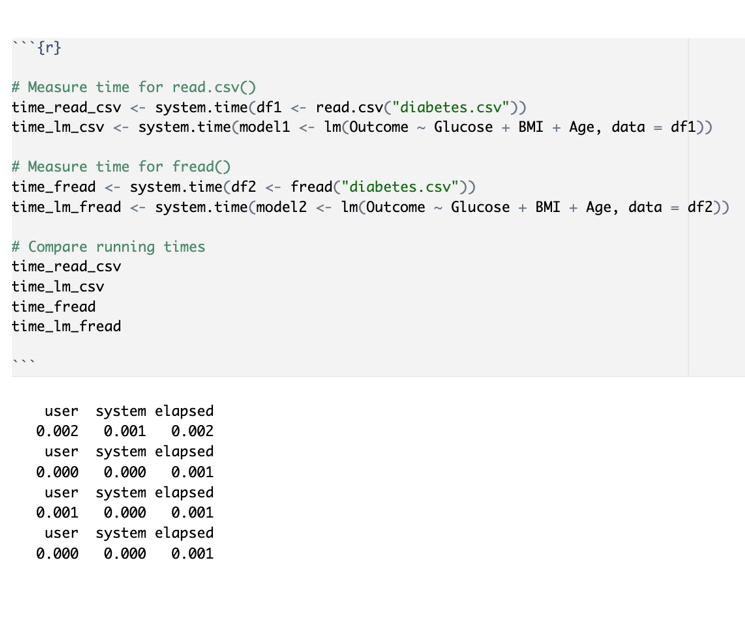

### Interpretation:
  
Looking at the system.time() measurements, fread() shows slightly faster data reading times:

Reads data in 0.001 seconds vs 0.002 seconds for read.csv()

Both methods take the same time (0.001 seconds) for model fitting

While the difference is small due to the dataset size, fread() demonstrates better performance in reading the data. The model fitting time is same for both methods.


**Performance Profiling and Data Tab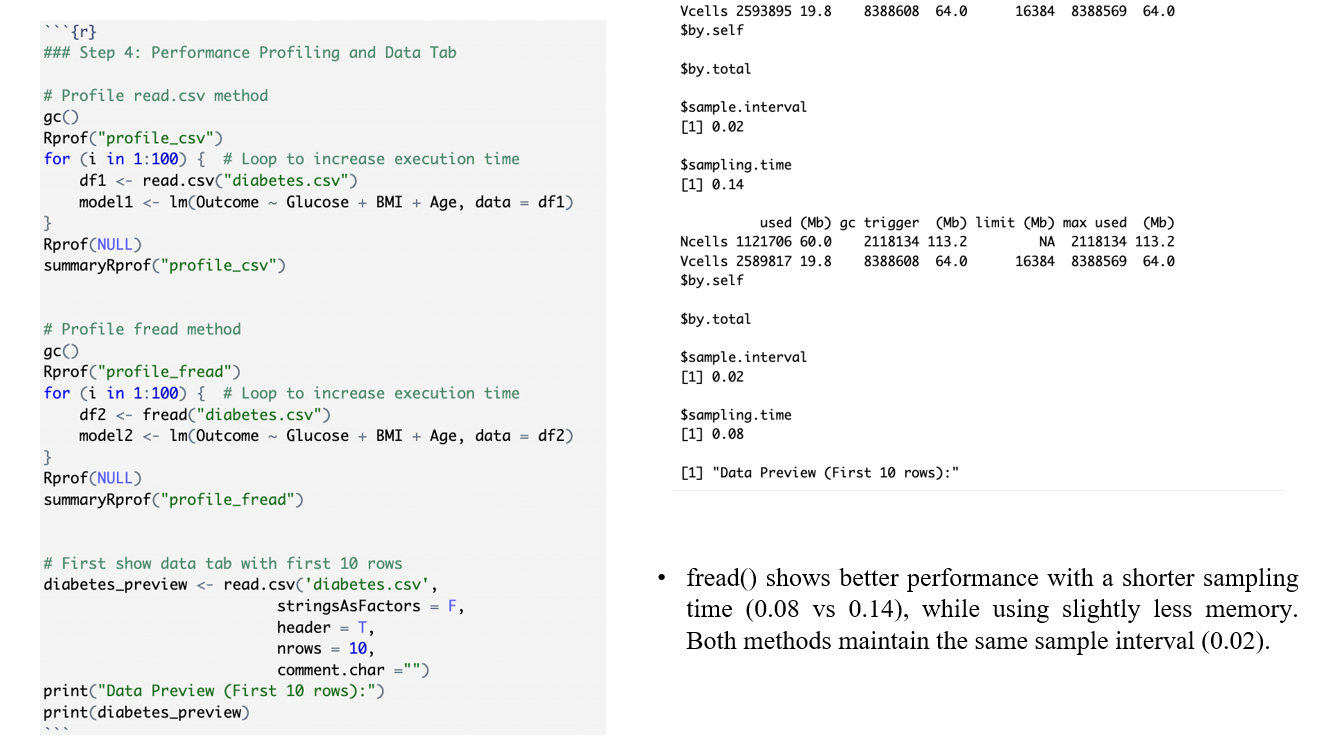**

**Flame Graph after profiling for read.csv()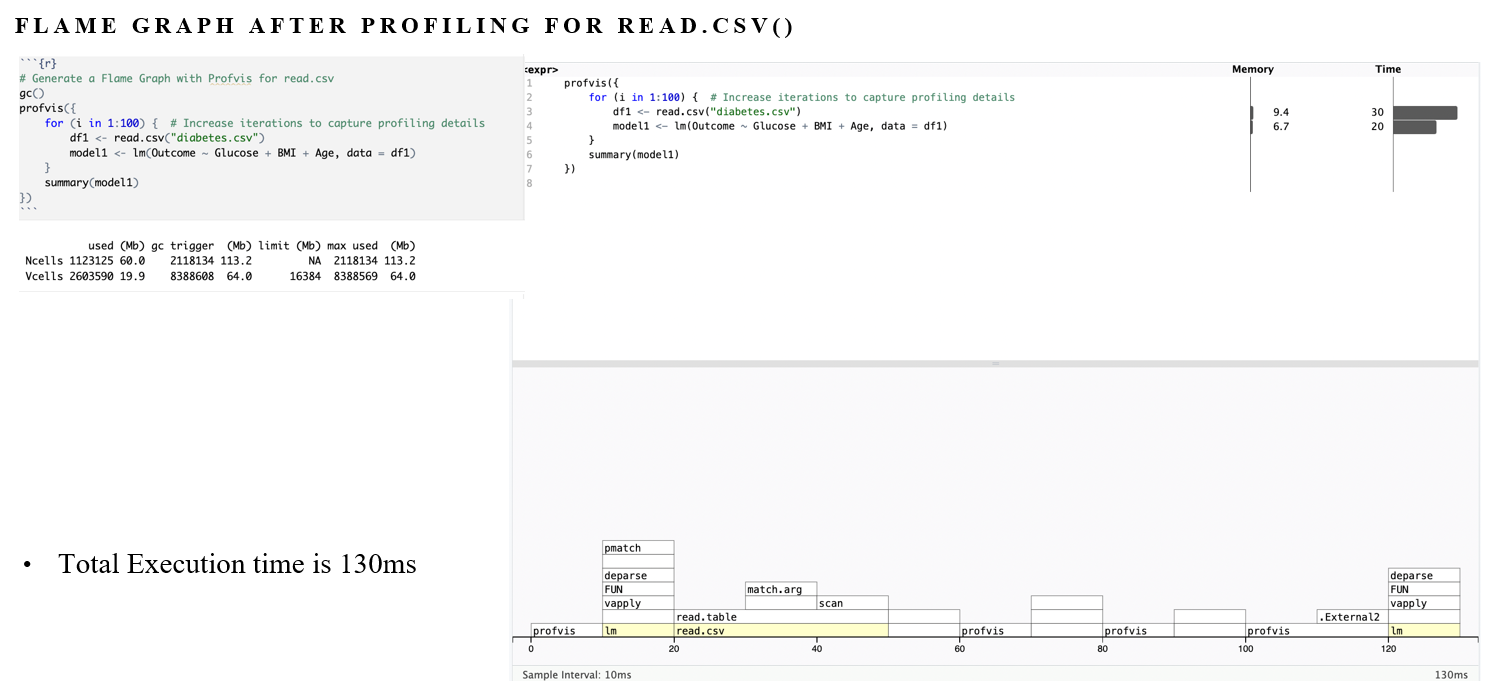**

**FLAME GRAPH AFTER PROFILING WITH FREAD()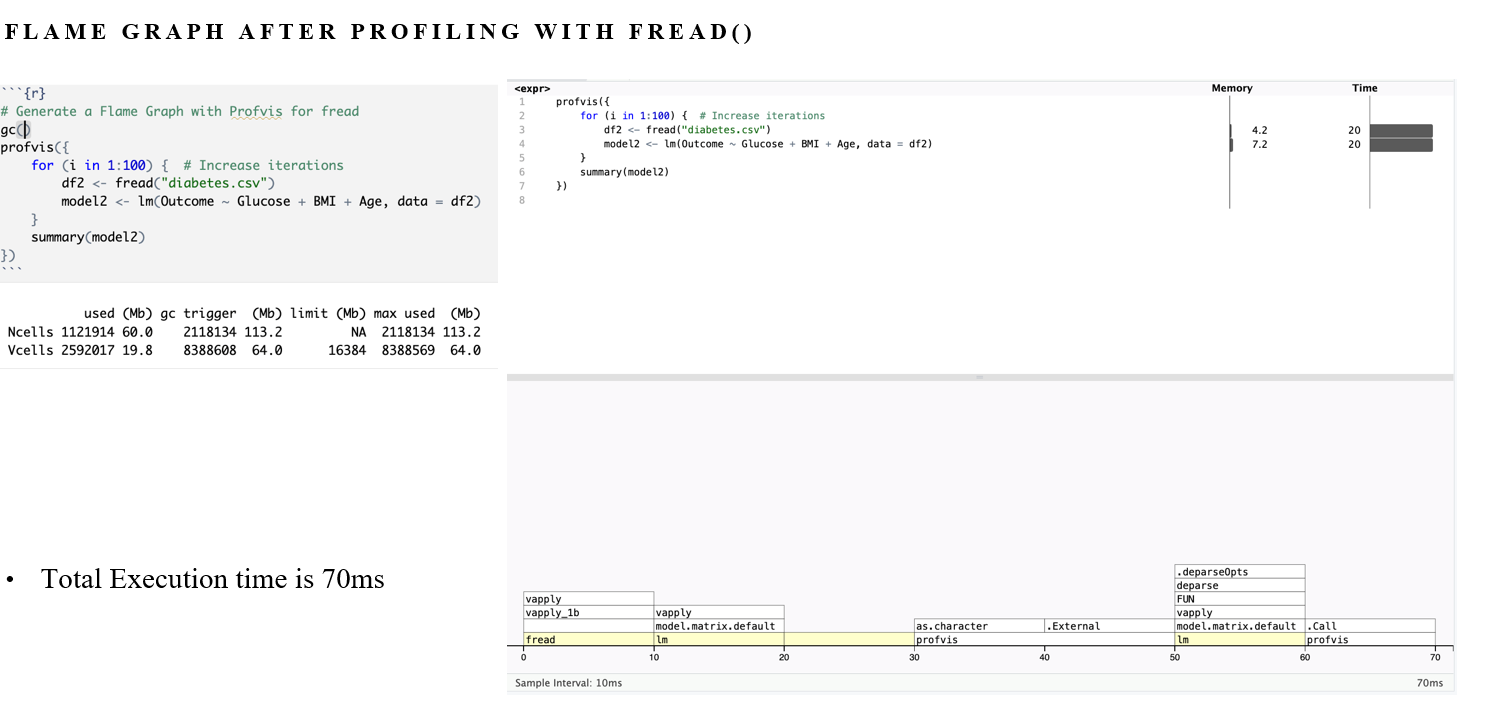**

### WHICH METHOD IS FASTER?

The fread() executes data input and model execution tasks faster than the read.csv() method.

The total execution time using fread() requires 70ms compared to 130ms for read.csv().

The flame graphs demonstrate that fread() has a more streamlined execution path with fewer intermediate function calls compared to read.csv() which requires additional steps through match.arg, scan, and read.table functions.

While both methods successfully perform the linear regression analysis with the same model specification (Outcome ~ Glucose + BMI + Age), fread() accomplishes this more efficiently, making it the optimal choice for processing the diabetes dataset.

The memory usage is also more efficient with fread() (4.2-7.2 Mb) compared to read.csv() (6.7-9.4 Mb), further supporting fread() as the preferred method for the analysis.


### Select 2-3 features as X and one categorial feature for target: Selected pregnancies, age, glucose as x feature and outcome as categorical feature


In [48]:
# IMPORTED PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [49]:
# LOAD DATA

diabetes = pd.read_csv("diabetes.csv")

# SELECT FEATURES AND TARGET VARIABLE

X = diabetes[['Pregnancies', 'Age', 'Glucose']]
y = diabetes['Outcome']

### Accuracy Of Model Before Dask

In [50]:
# Split Data Into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define And Train The Ramdom Forest Model
diabetes_clf = RandomForestClassifier(n_estimators=50, random_state=42)
diabetes_clf.fit(X_train, y_train)

# Make Predications
y_pred = diabetes_clf.predict(X_test)

# Evaluate The Model
CM = confusion_matrix(y_test, y_pred)
print("confusion_matrix:\n", CM)

AS = accuracy_score(y_test, y_pred)
print("accuracy_score:", AS)

CR = classification_report(y_test, y_pred)
print("classification_report:\n", CR)

confusion_matrix:
 [[122  29]
 [ 36  44]]
accuracy_score: 0.7186147186147186
classification_report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.60      0.55      0.58        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.72      0.72       231



### Interpretation:
  The model's accuracy is 71.86%, or almost 72% of the time, which is respectable but not flawless. With Class 0 (negative cases), it performs better, catching 81% of the actual negatives (Recall: 81%) and accurately identifying 77% of the ones it predicts as negative (Precision: 77%). With only 60% of its positive predictions coming true (Precision: 60%) and only 55% of all real positives (Recall: 55%), it performs worse in Class 1 (positive cases), suggesting it misses a significant number of them. Overall, the model tends to be good at recognizing negatives.



### Created the Random Forest graph before Dask

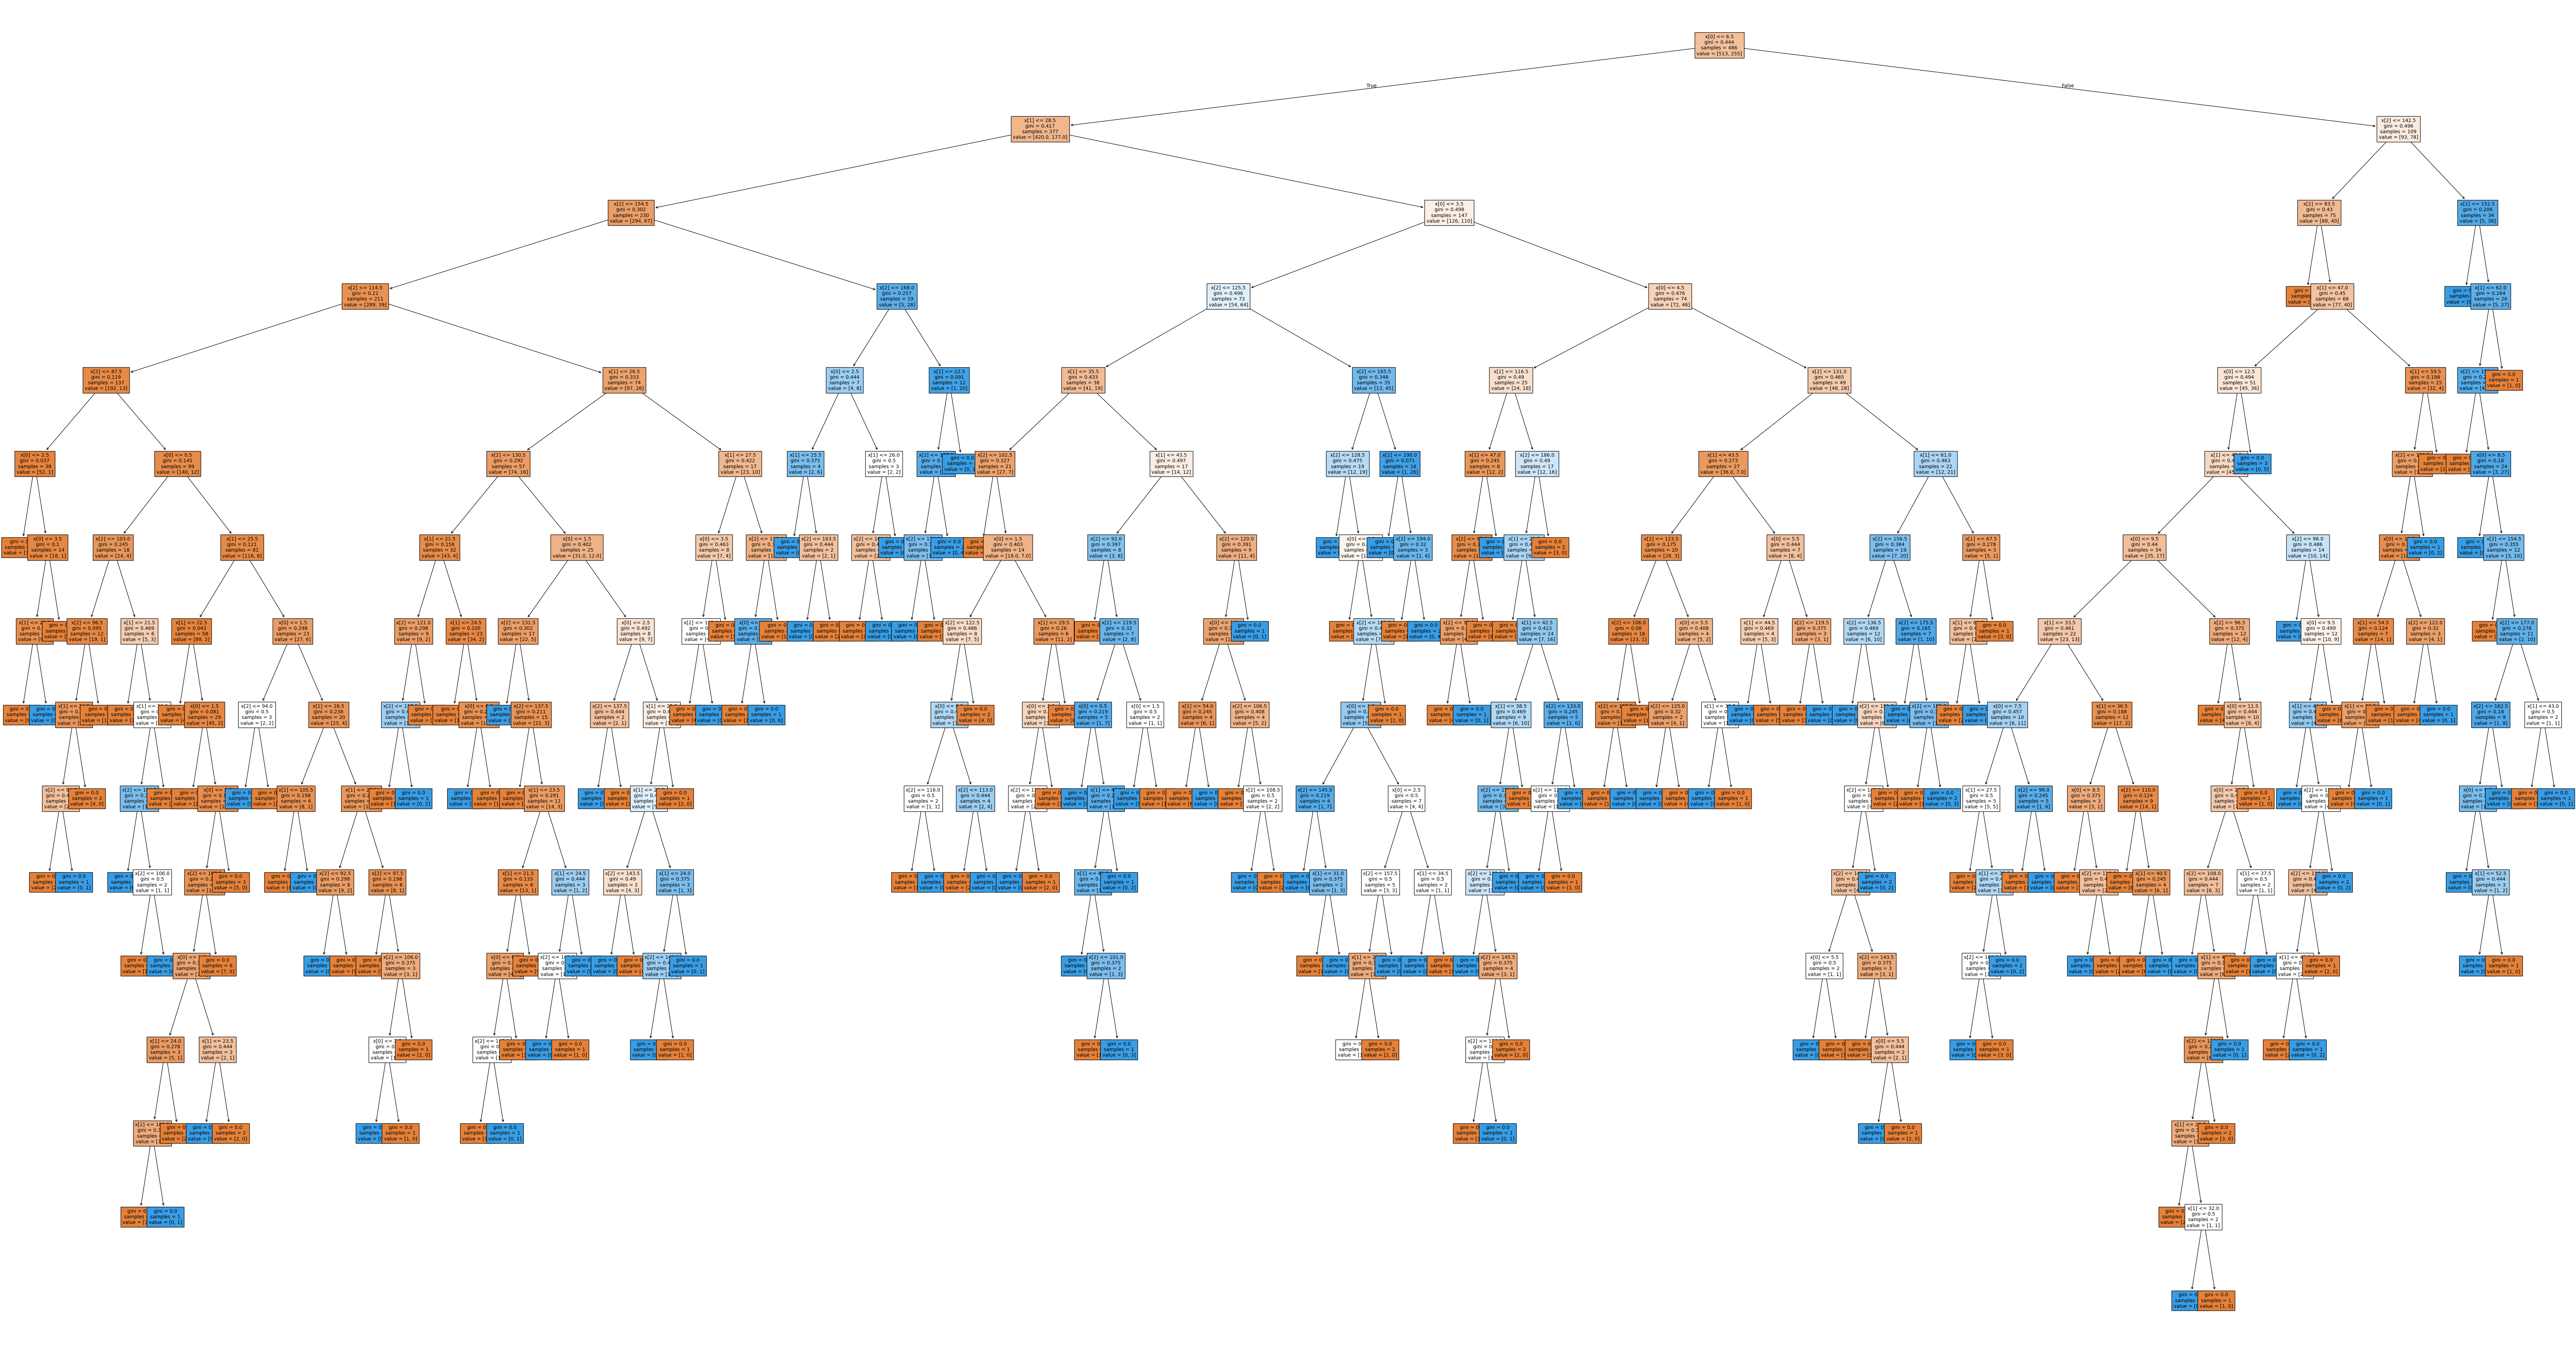

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define features and target
X = diabetes[['Pregnancies', 'Age', 'Glucose']]
y = diabetes['Outcome']

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X, y)

# Plot the first tree in the forest
plt.figure(figsize=(95, 50))
tree.plot_tree(rf.estimators_[0], filled=True, fontsize=10)
plt.show()


# Interpretation  for the graph before dask:
  Each internal node represents a condition based on one of the features, such as Pregnancies, Age, or Glucose. For instance, a node might split on Glucose <= 120, meaning that if Glucose is less than or equal to 120, the data will go to the left child, and if greater, it will go to the right child. The terminal nodes show the predicted outcome, where 0 represents "no diabetes" and 1 represents "diabetes." These predictions are based on the majority class of the samples in each leaf node. The color of each node corresponds to the majority class at that node, helping to illustrate how the tree classifies individuals with different feature values.


In [64]:
# CALUCULATE RUNNING TIME

import time
start_time = time.time()
diabetes_clf = RandomForestClassifier(n_estimators=50, random_state=42)
diabetes_clf.fit(X_train, y_train)
end_time = time.time()
non_parallel_time = end_time - start_time
print(non_parallel_time)



0.10885262489318848


### Interpretation:
  The running time for training the RandomForestClassifier with 50 estimators on the diabetes dataset is approximately 0.108 seconds. This time shows how long it took to fit the model on the training data. It is the non-parallel time, meaning the model was trained using a single core and the computations were not spread across multiple processors or threads. For larger datasets or more complex models, using parallel processing could reduce the training time significantly.


### Created the Random Forest graph after Dask and accuracy

In [38]:
# IMPORT PACKAGES

from dask.distributed import Client
from sklearn.metrics import accuracy_score

# Initialize Dask Client
client = Client(n_workers=4)

# Define Features (X) and target (y)
X = diabetes[['Pregnancies', 'Age', 'Glucose']]
y = diabetes['Outcome']

# Train_Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
dask_model = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state=42)
dask_model.fit(X_train, y_train)

# Predictions
y_pred = dask_model.predict(X_test)

# Accuracy Calculation
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Close Dask Client
client.close()





INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:43441
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38427'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46795'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42273'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34319'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:35061 name: 3
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35061
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:56014
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:34261 name: 2
INFO:

Model Accuracy: 0.7186147186147186


INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:34319' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:38427' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:46795' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:42273' closed.
INFO:distributed.scheduler:Closing scheduler. Reason: unknown
INFO:distributed.scheduler:Scheduler closing all comms


### Interpretation:
  It initializes a Dask Client with 4 workers and trains a RandomForestClassifier using Pregnancies, Age, and Glucose as features to predict diabetes (Outcome). After splitting the data into training and test sets, the model achieves an accuracy of 71.86%, meaning it correctly predicted diabetes outcomes for about 72% of the test samples. A warning appears about port 8787 being in use, but the process continues on a different port. The Dask Client is then closed.


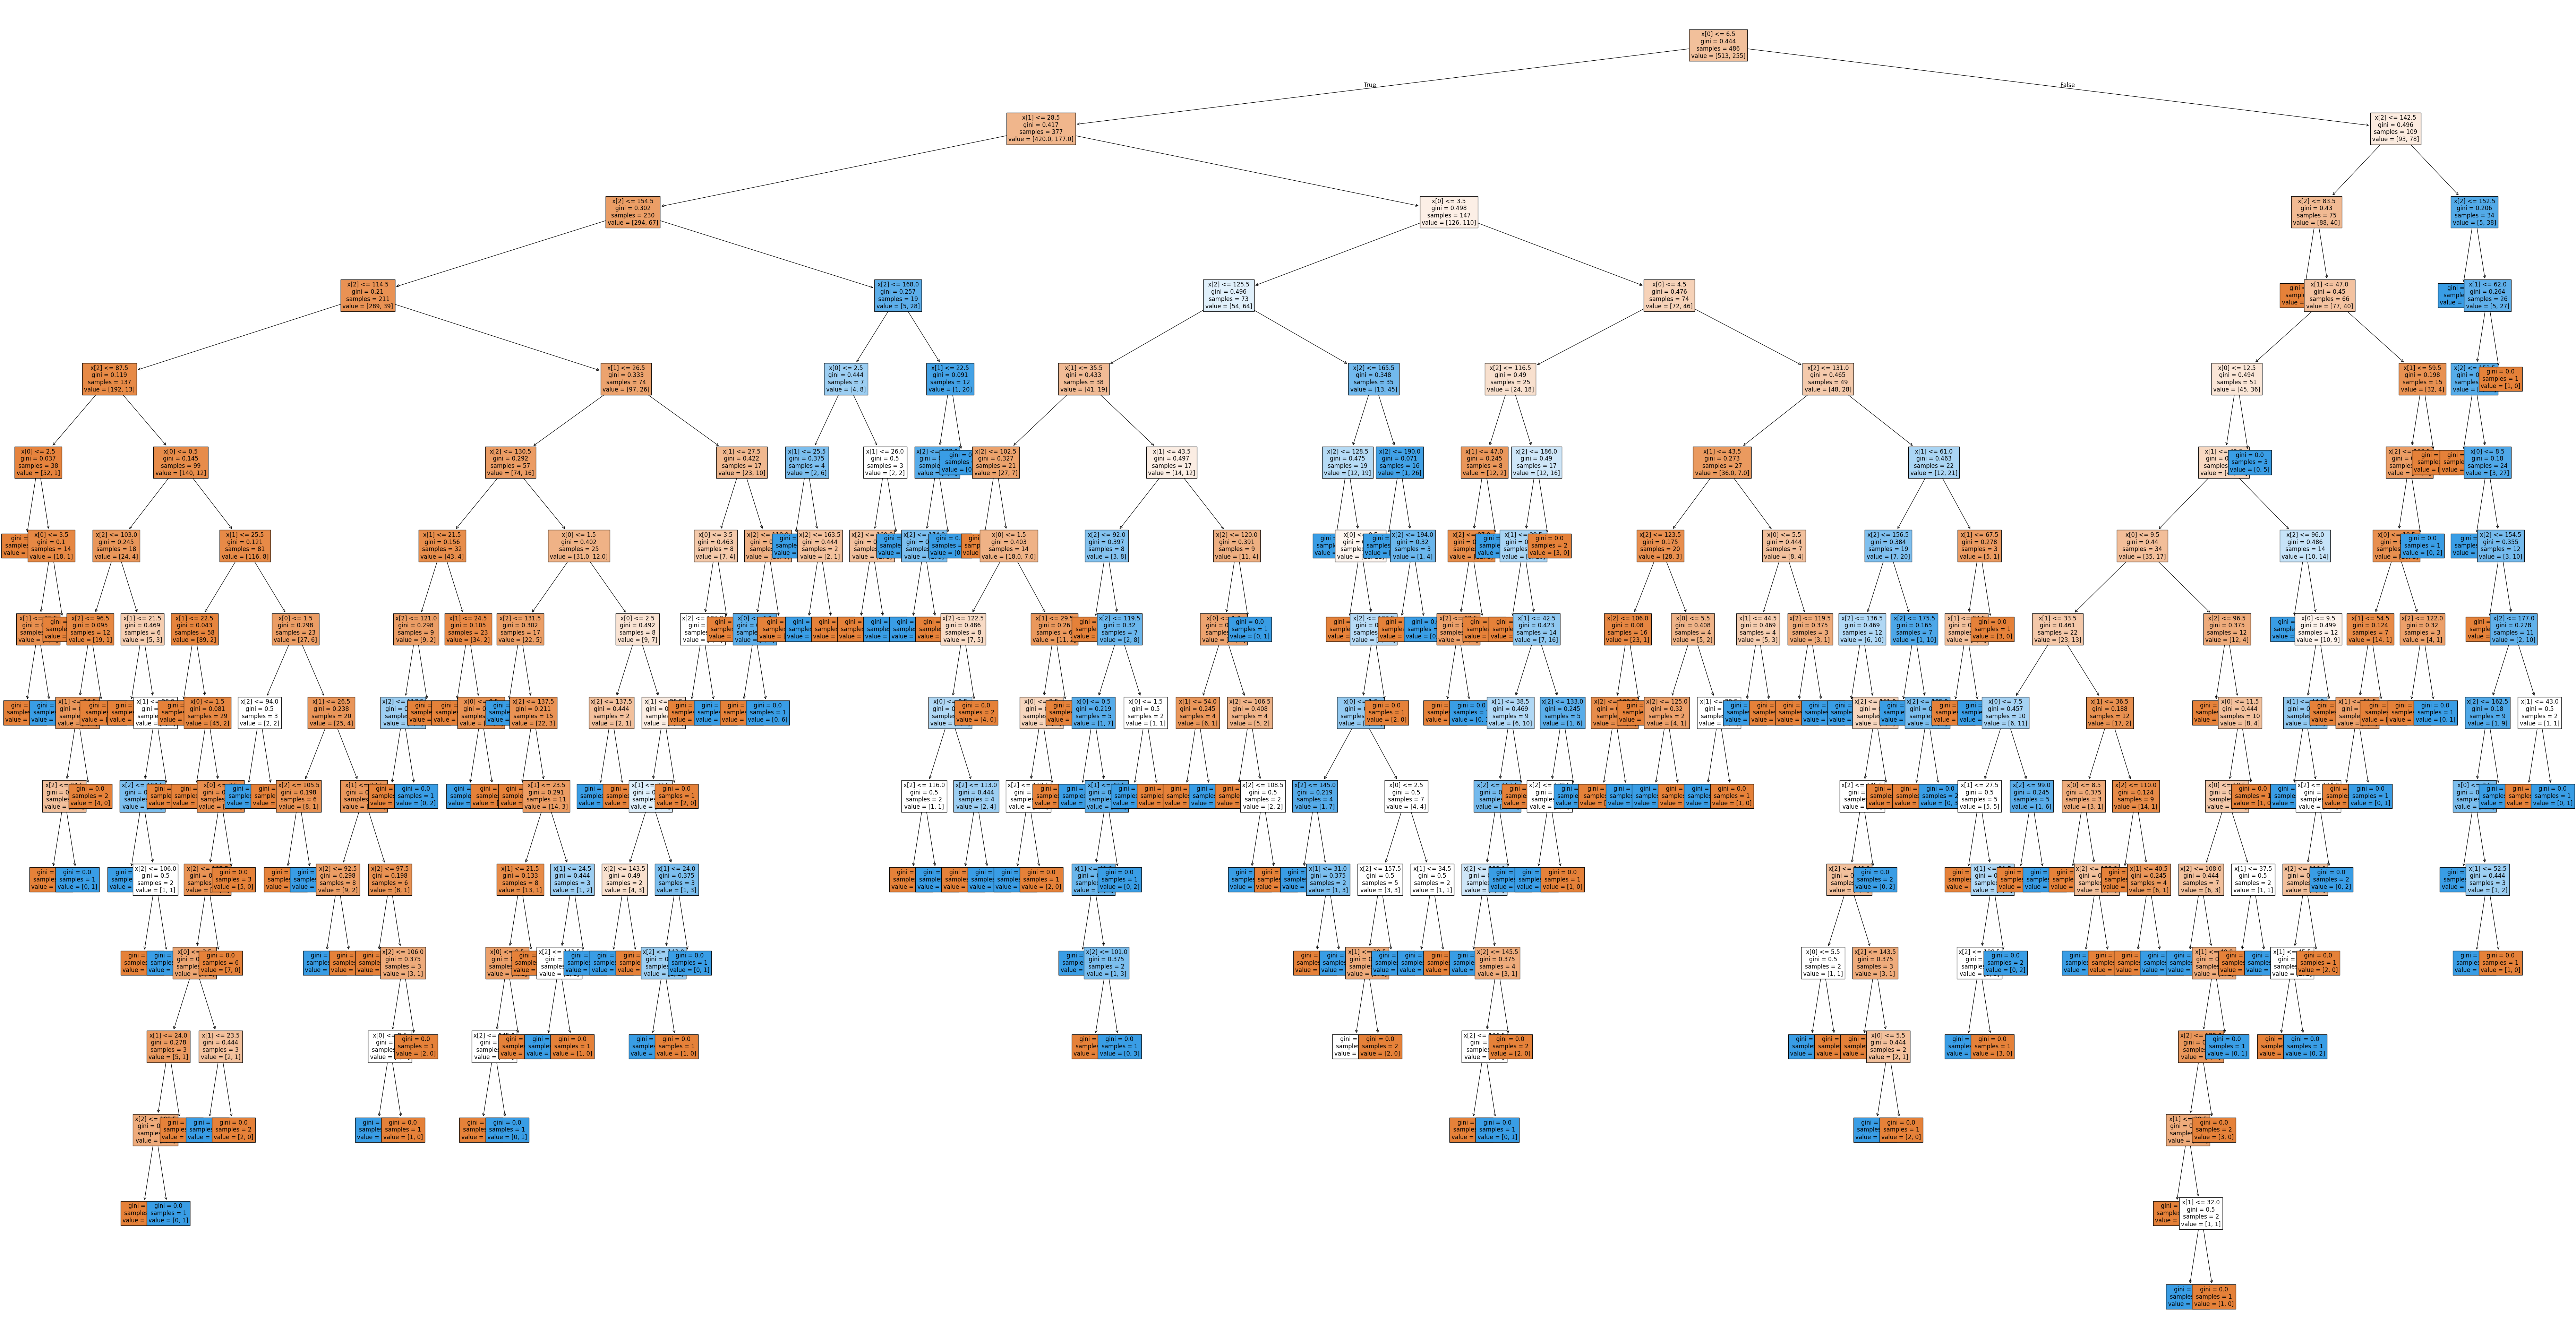

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define features and target
X = diabetes[['Pregnancies', 'Age', 'Glucose']]
y = diabetes['Outcome']

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X, y)

# Plot the first tree in the forest
plt.figure(figsize=(95, 50))
tree.plot_tree(rf.estimators_[0], filled=True, fontsize=12)
plt.show()

### Interpretation:
  The code visualizes the first decision tree from a Random Forest model trained on the diabetes dataset, using Pregnancies, Age, and Glucose as features to predict Outcome. The tree splits based on feature values, such as Glucose <= 120, and predicts diabetes (1) or no diabetes (0) at the leaf nodes. The plot is large for clarity, with colors representing the majority class at each node and a font size of 12 for better readability.|


In [70]:
# CALUCULATE RUNNING TIME

import time
start_time = time.time()
diabetes_model = RandomForestClassifier(n_estimators=50, random_state=42)
diabetes_model.fit(X_train, y_train)
end_time = time.time()
parallel_time = end_time - start_time
print(parallel_time)


0.09494400024414062


### Interpretation:
  It measures the training time of a RandomForestClassifier with 50 estimators and a maximum depth of 10, using the training data. The training process is completed in approximately 0.094 seconds. This is the parallel processing time, as the model is trained using multiple workers, which speeds up the process compared to training without parallelism. The value of 0.044 seconds indicates how long it took to fit the model with the given settings.


### Which method was faster?

The chart shows a comparison of execution times for a task run without parallelization versus using Dask for parallel execution.

The non-parallel approach took more seconds", while the parallelized version using Dask took less.  

This improvement highlights the benefits of using Dask for handling computations more efficiently, especially for larger datasets where the speed-up can be even more noticeable.


In [74]:
start_time = time.time()
dask_model = RandomForestClassifier(n_estimators=50,max_depth = 10, random_state=42)
dask_model.fit(X_train, y_train)
end_time = time.time()
parallel_time = end_time - start_time
print(parallel_time)

0.08869600296020508


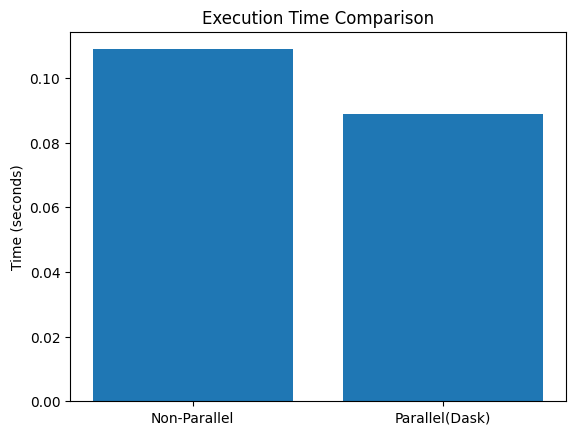

In [75]:
# Plot Results Of Running Time Before And After Paraallerlization
plt.bar(['Non-Parallel', 'Parallel(Dask)'], [non_parallel_time, parallel_time])
plt.ylabel('Time (seconds)')
plt.title('Execution Time Comparison')
plt.show()

### Genetic Algorithm for Feature Selection and Importance

In [76]:
pip install pygad numpy pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.5 MB/s eta 0:00:00


In [83]:
import pygad
import numpy as np
import pandas as pd
import time
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [84]:
# Load the diabetes dataset
df = pd.read_csv("diabetes.csv")
# Select features and target variable
X = df[['Glucose', 'BMI', 'Age']].values
y = df['Outcome'].values

In [85]:
# Convert X and y to NumPy array (to ensure consistency)
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(df.head(2))
print(X)
print(y)



   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0

[2 rows x 9 columns]
[[148.   33.6  50. ]
 [ 85.   26.6  31. ]
 [183.   23.3  32. ]
 ...
 [121.   26.2  30. ]
 [126.   30.1  47. ]
 [ 93.   30.4  23. ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 

**The result of feature importance shows BMI is the most influential predictor of diabetes Weight (7.63), followed by Glucose (2.63), while Age has minimal impact (0.009). The model achieved 77.27%(0.7727) accuracy, with 85 true negatives, 34 true positives, 14 false positives, and 21 false negatives. Precision for diabetes prediction was 71%(0.71), recall 62%(0.62), and F1-score 66%(0.66), while the model performed better for non-diabetic cases. This imbalance suggests the model could improve by better balancing the data**


Feature Importance Based on GA Weights:
   Feature  Importance
1      BMI    7.631604
0  Glucose    2.630224
2      Age    0.009387

Final Model Accuracy: 0.7727272727272727

Confusion Matrix:
 [[85 14]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        99
         1.0       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



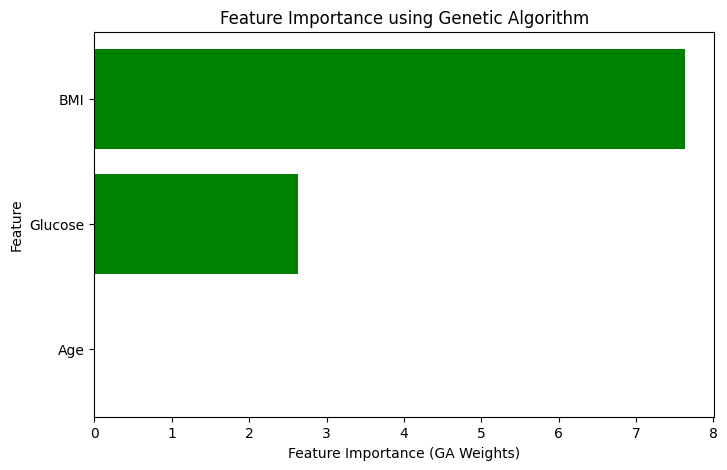


Total Execution Time: 23.904 seconds


In [86]:
# Define the fitness function for Genetic Algorithm (GA)
def fitness_function(ga_instance, solution, solution_idx):
    solution = np.array(solution, dtype=np.float64)  # Ensure it's a NumPy array (float)

    # Train Logistic Regression model using GA-selected feature weights
    model = LogisticRegression()
    model.fit(X_train * solution, y_train)  # Multiply features by solution (weights)

    # Predict and calculate accuracy
    y_pred = model.predict(X_test * solution)
    return accuracy_score(y_test, y_pred)

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

# Define GA parameters
num_generations = 200 # Number of generations
num_parents_mating = 5  # Number of parents selected for mating
sol_per_pop = 10  # Population size
num_genes = X.shape[1]  # Number of selected features

# Initialize GA
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    fitness_func=fitness_function,
    mutation_percent_genes=5,
    mutation_num_genes=1  # Ensures at least 1 gene is mutated
)

# Run GA
start_time = time.time()
ga_instance.run()
end_time = time.time()

# Get the best solution from GA
best_solution, best_fitness, _ = ga_instance.best_solution()

if best_solution is not None:
    best_solution = np.array(best_solution, dtype=np.float64).flatten()
else:
    print("Error: GA did not return a valid solution.")
    exit()

# Train Logistic Regression model with the optimal feature weights
model_final = LogisticRegression()
model_final.fit(X_train * best_solution, y_train)

# Predict on the test set
y_pred = model_final.predict(X_test * best_solution)

# Compute accuracy and evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Extract feature importance from GA weights
importance_df = pd.DataFrame({"Feature": ['Glucose', 'BMI', 'Age'], "Importance": np.abs(best_solution)})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print results
print("\nFeature Importance Based on GA Weights:")
print(importance_df)
print("\nFinal Model Accuracy:", test_accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot feature importances
plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="green")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel("Feature Importance (GA Weights)")
plt.ylabel("Feature")
plt.title("Feature Importance using Genetic Algorithm")
plt.show()

# Print execution time
print(f"\nTotal Execution Time: {end_time - start_time:.3f} seconds")

### Total Execution Time: 23.904 seconds

GA evolves solutions over generations, so more iterations allow it to discover better weight distributions.

Features that seemed important in earlier generations may be replaced by others that contribute more to accuracy over time.

BMI and Glucose both predict diabetes well, GA may prioritize one over the other depending on how the population evolves over more generations.

Increase in execution time is also probably due to increse in number of generations

**The results clearly show that BMI is the most important factor in predicting diabetes, having a much stronger impact on the model than the other features. While Glucose is also important, it doesn’t have as much influence as BMI. Age, on the other hand, plays a very minimal role, making it less useful for predicting diabetes in this case. So, overall, BMI is the key feature for predicting diabetes.**

### Dask Computing and pandas

In [87]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import time

In [88]:
# Load the CSV using Dask
start = time.time()
df = dd.read_csv('diabetes.csv')
end = time.time()
print(f"Dask Load Time: {end - start:.4f} seconds")

df.head()


Dask Load Time: 0.0333 seconds


Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [89]:
# Define binning function
def assign_age_group(df):
    df['AgeGroup'] = pd.cut(df['Age'],
                            bins=[20, 30, 40, 50, 60, 70, 80],
                            labels=['20s', '30s', '40s', '50s', '60s', '70s'])
    return df

# Apply function to each partition
df = df.map_partitions(assign_age_group)

# Group by AgeGroup and Outcome to get average BMI
start = time.time()
grouped = df.groupby(['AgeGroup', 'Outcome'])['BMI'].mean().compute()
end = time.time()

print(f"Dask GroupBy Time: {end - start:.4f} seconds")
print(grouped)

Dask GroupBy Time: 0.0732 seconds
AgeGroup  Outcome
20s       0          29.909174
          1          36.455556
30s       0          30.838272
          1          35.069737
40s       0          33.716327
          1          35.103125
50s       0          29.860870
          1          32.045161
60s       0          27.194444
          1          33.128571
70s       0          19.600000
          1                NaN
nan       0          25.900000
          1                NaN
Name: BMI, dtype: float64


/usr/local/lib/python3.11/dist-packages/dask_expr/_groupby.py:1554: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self._meta = self.obj._meta.groupby(


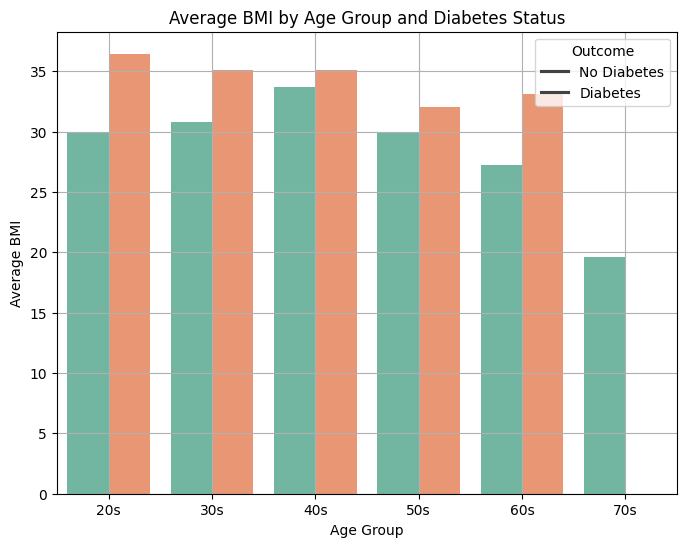

In [90]:
# Reset index for plotting
grouped = grouped.reset_index()

# Plot BMI comparison by AgeGroup and Diabetes Outcome
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x='AgeGroup', y='BMI', hue='Outcome', data=grouped, palette='Set2')
plt.title('Average BMI by Age Group and Diabetes Status')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.grid(True)
plt.show()


In [91]:
# Load with pandas for comparison
start = time.time()
df_pd = pd.read_csv('diabetes.csv')
df_pd['AgeGroup'] = pd.cut(df_pd['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20s', '30s', '40s', '50s', '60s', '70s'])
grouped_pd = df_pd.groupby(['AgeGroup', 'Outcome'])['BMI'].mean()
end = time.time()
print(f"Pandas GroupBy Time: {end - start:.4f} seconds")

Pandas GroupBy Time: 0.0309 seconds


<ipython-input-91-c626203715ea>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_pd = df_pd.groupby(['AgeGroup', 'Outcome'])['BMI'].mean()


In this study Age, BMI, and Outcome as the major features.

 Research topic was: "Does the average BMI vary between diabetic and non-diabetic individuals across different age groups?"

 To Prove that Dask is used as effectively analyze the data, which greatly reduced calculation time, with the group by operation taking only 0.0732 seconds to complete. We estimated each subgroup's average BMI using the group by function on Age Group and Outcome. Individuals with diabetes had a higher average BMI than those without diabetes across all age categories, with the discrepancy being most pronounced in the younger (20s) and older (60s) populations. This research provides a solid platform for visualizing trends and developing additional insights.
